# Feature to response correlation analysis on TF affinity scores obtained from a window of size 100bp around TSS
We decided to change the window size centered on the TSS of the genes estimating the binding affinities of the TFs binding in that region.

## Load the partitioned and normalized data (to save I/O operations)

In [1]:
## The code illustrating how the RData loaded in the cell below is generated (too heavy for jupyter to run).

## Read the static features and assign the ENSG column as rownames
# x <- read.table("/MMCI/MS/EpiregDeep2/work/Tools/TEPIC_GS/hg38_Static/100bp/STATIC_Features_hg38_100bp_Gene_View.txt", header= T, stringsAsFactors= F)
# rownames(x) <- x$ENSG
# x <- x[, -1]
#########################################################
## Read bulk rna data
# bulk.rna <- read.table("/MMCI/MS/DEEP-liver/work/Data/41/mRNA/LiHe/GRCh37/41_Hf01_LiHe_Ct_mRNA_K_1.LXPv1.20150530_genes.fpkm_tracking",header= T, stringsAsFactors =  F)
# new_gene_id <- sapply(seq(nrow(bulk.rna)), function(i)strsplit(bulk.rna$gene_id[i ], "\\.")[[1]][1])                                                                                                                                       
# bulk.rna$gene_id <- new_gene_id                                                                                                                                                                                                            
# bulk.rna.original <- bulk.rna                                                                                                                                                                                                              
# dupl.genes <- duplicated(bulk.rna$gene_id)                                                                                                                                                                                                 
# bulk.rna <- bulk.rna[!dupl.genes, ]                                                                                                                                                                                                        
# gene_names <- bulk.rna$gene_id                                                                                                                                                                                                             
# bulk.rna <- data.frame(FPKM= bulk.rna$FPKM)                                                                                                                                                                                                
# rownames(bulk.rna) <- gene_names               
#########################################################
## Find the genes in x (static features) that exist in bulk.rna
# x.hits <- which(rownames(x) %in% rownames(bulk.rna))
############
## subset x according to the hits with bulk.rna genes
# x <- x[x.hits, ]
#########################################################
## Find the bulk.rna genes corresponding to the static feature genes (for each gene in x look for the hit index in bulk.rna)
# idx <- NULL;
# for(i in seq(nrow(x)))
#    idx <- c(idx, which(rownames(x)[i] == rownames(bulk.rna)))
############
## subset y according to the hits with x genes
# y <- bulk.rna[idx, ]
############
## Check if the subset variables match
# all.equal(rownames(x), rownames(bulk.rna)[idx])
##[1] TRUE
############
## Save the variables, ready to be loaded in jupyter
# save(x, y, file= "TF_hg38_100bp_LiHe.RData")

In [2]:
load("../TF_hg38_100bp_LiHe.RData")

### List of variables in the workspace after loading the data file

In [3]:
print(ls())

[1] "x" "y"


### Dimensions of the training and test data

In [6]:
print("x:")
print(dim(x))

print("y:")
print(length(y))

[1] "x:"
[1] 52527   726
[1] "y:"
[1] 52527


In [7]:
print(range(x))
print(range(y))

[1] 0.000000 6.016953
[1]     0.0 12081.8


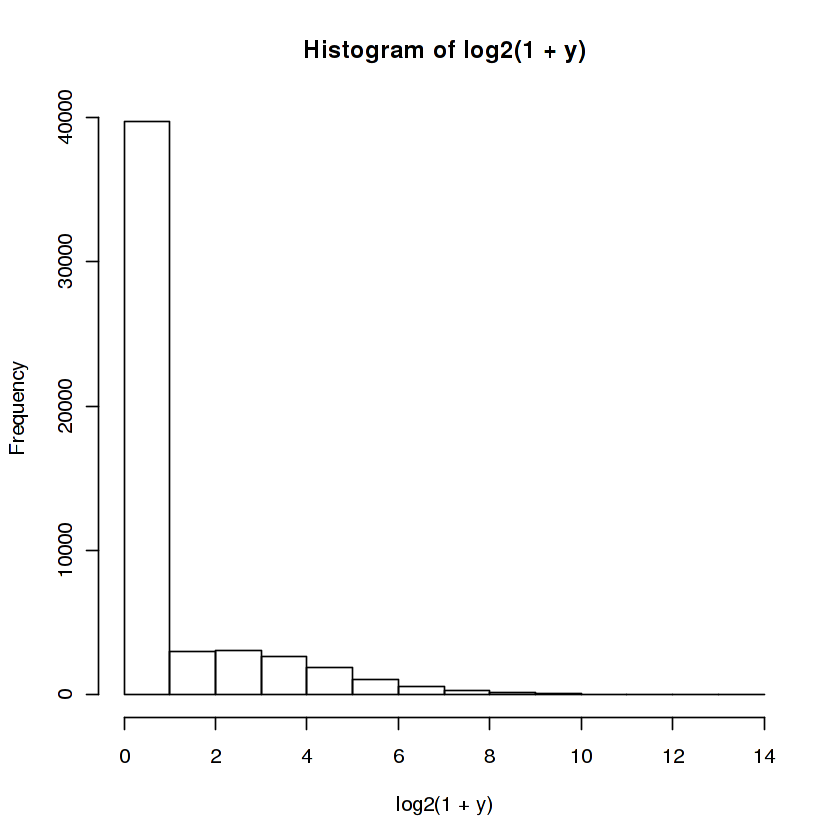

In [8]:
hist(log2(1 + y))

## Compute feature to response correlations (unfiltered data)

### Raw data (original space)

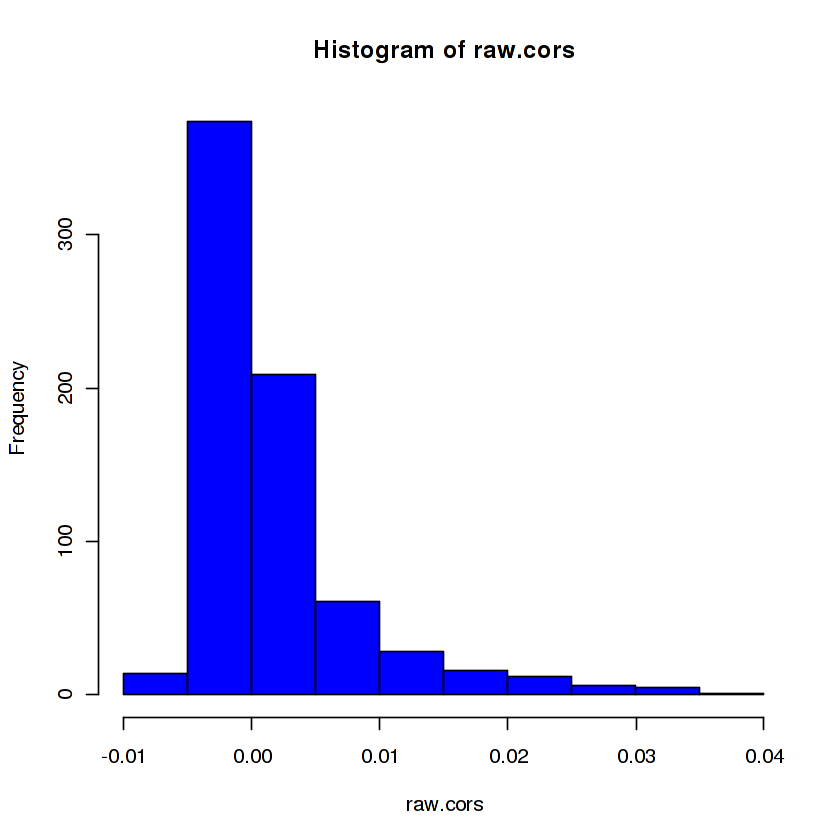

In [9]:
raw.cors <- sapply(seq(ncol(x)), function(i)cor(y, x[, i]))
hist(raw.cors, col= "blue")

### Log-transformed data (log space)

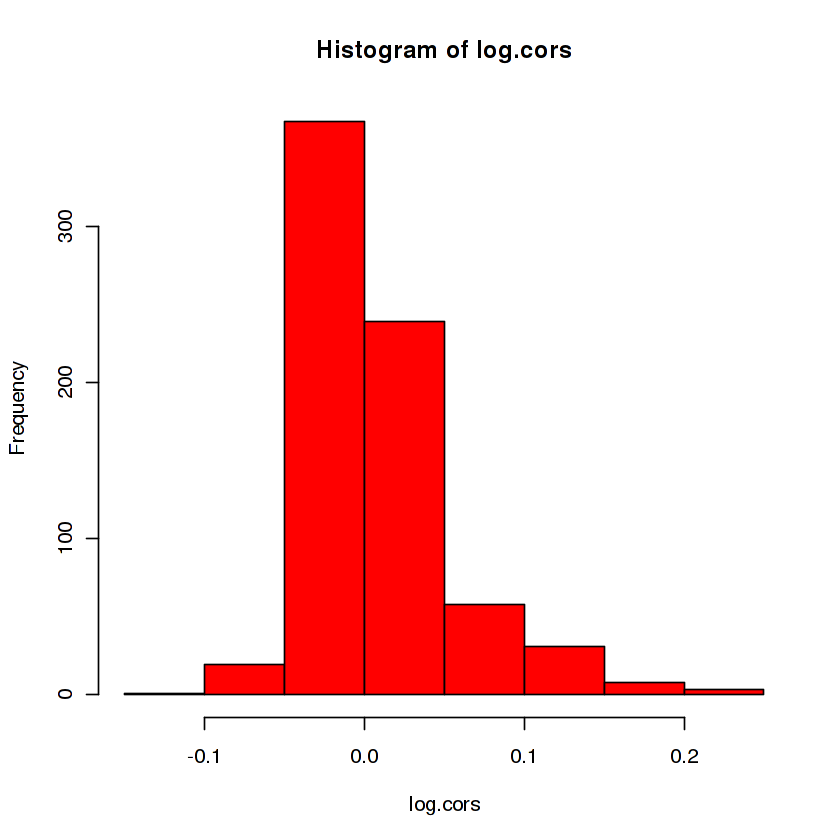

In [10]:
log.cors <- sapply(seq(ncol(x)), function(i)cor(log2(1 + y), log2(1 + x[, i])))
hist(log.cors, col= "red")

**Apparently log transforming the data reduces the association between features and response**

## Remove zero-expressed genes

In [11]:
zeros.idx <- which(y == 0)
print(length(zeros.idx))

[1] 29948


In [12]:
x_filtered <- x[-zeros.idx, ]
y_filtered <- y[-zeros.idx]

In [13]:
print(dim(x_filtered))
print(length(y_filtered))

[1] 22579   726
[1] 22579


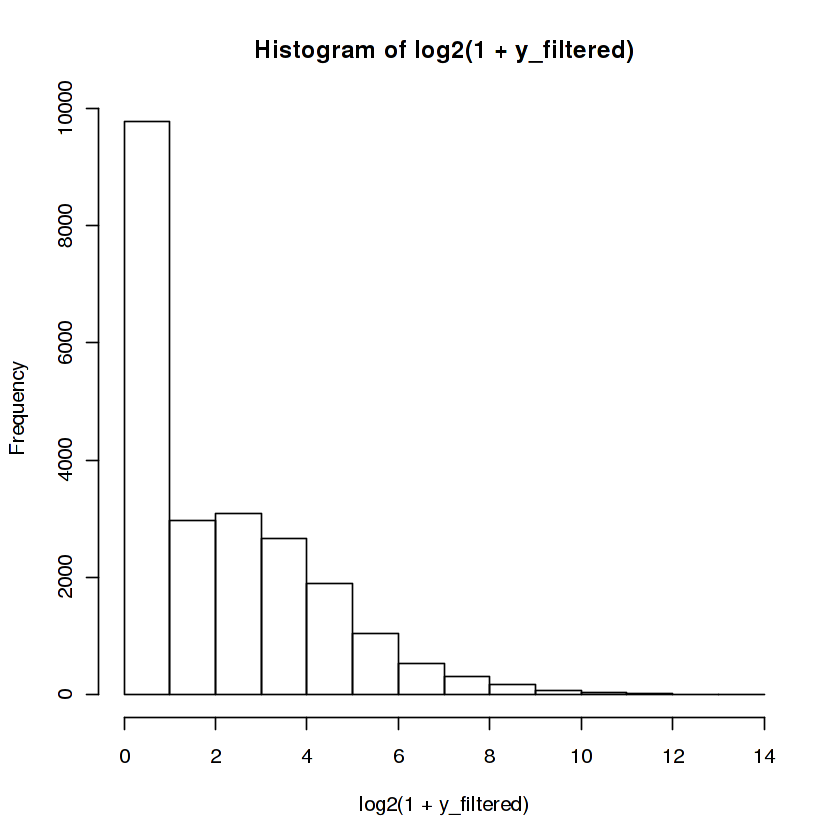

In [14]:
hist(log2(1 + y_filtered))

## Compute feature to response correlations (filtered data)

### Raw filtered data (original space)

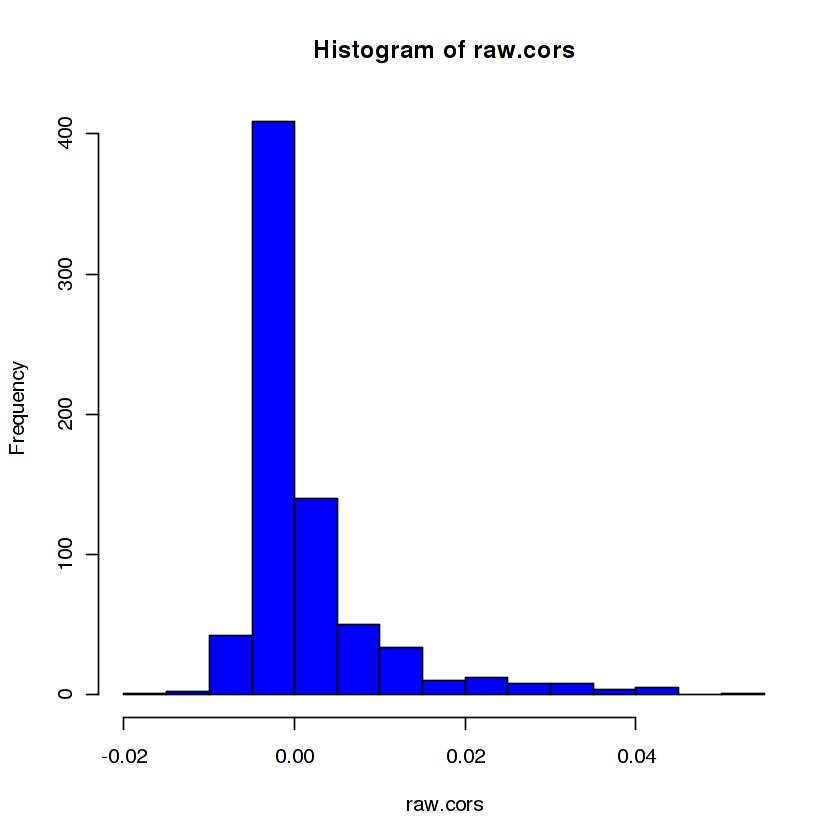

In [15]:
raw.cors <- sapply(seq(ncol(x_filtered)), function(i)cor(y_filtered, x_filtered[, i]))

hist(raw.cors, col= "blue")

### Log-transformed filtered data (log space)

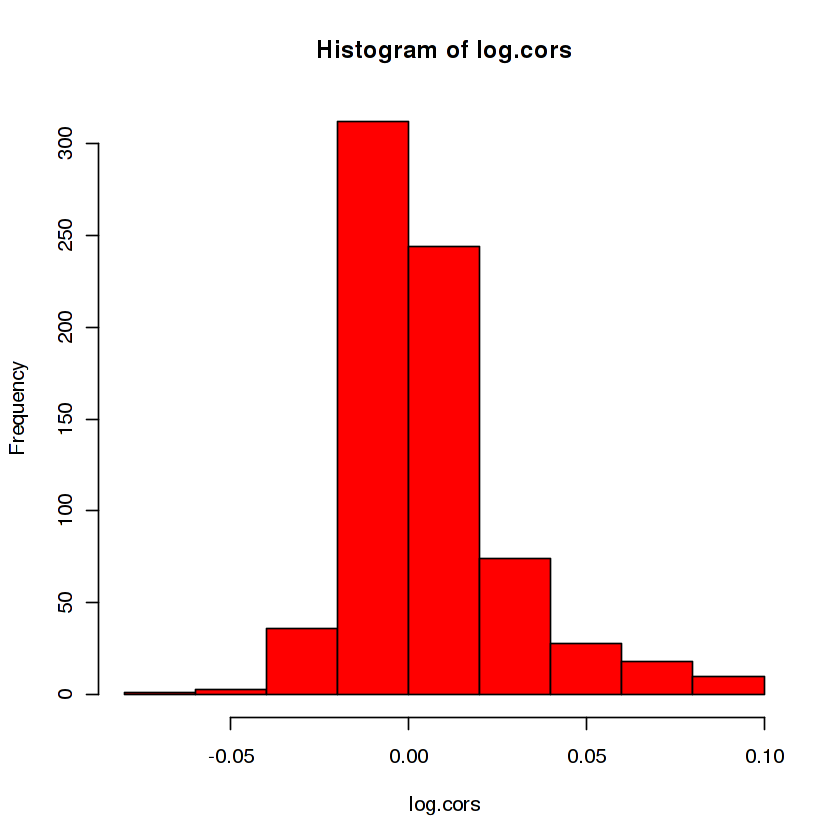

In [16]:
log.cors <- sapply(seq(ncol(x_filtered)), function(i)cor(log2(1 + y_filtered), log2(1 + x_filtered[, i])))

hist(log.cors, col= "red")

# Conclusion
* We examined the influence of the window size ([200bp](https://github.com/fba67/scMTL/blob/master/feat2resp_bulk_LiHe_200bpWinTF.ipynb) and [500bp](https://github.com/fba67/scMTL/blob/master/feat2resp_bulk_LiHe_500bpWinTF.ipynb)) used to annotate the TF binding affinities around the TSS on the feature values and how that affects the strength of association between features and response
* Also, measured the correlation between each TF and gene expression for both 1) raw and 2) log-transformed data, where the correlation values were in favor of log-transformed data
* We filtered the zero-expressed genes (discarded ~30,000 genes with exact zero expression), to examine the affects of zero-expression removal on the correlations. The results show that the correlation range shrinks to a smaller interval, suggesting that the higher correlation that was observed among the full gene set was driven by a subset of zero expression correlating with the small-valued features.